In [20]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rahulrajagopal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/rahulrajagopal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/rahulrajagopal/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/rahulrajagopal/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [7]:
# Load your dataset
df = pd.read_csv("../reviews.csv")

# Look at shape and first rows
print("Dataset shape:", df.shape)
df.head()


Dataset shape: (775, 7)


,Index,Name,Overall_Rating,Cuisine,Rate for two,City,Review
0,0,Oliver Brown,3.9,"Cafe, Coffee, Shake, Juices, Beverages, Waffle...",500,ahmedabad,Been to this place 3-4 times. Prakash is alway...
1,1,Oliver Brown,3.9,"Cafe, Coffee, Shake, Juices, Beverages, Waffle...",500,ahmedabad,I recently visited Oliver Brown on a weekend f...
2,2,Crush Coffee,3,"Cafe, Shake, Beverages, Desserts",600,ahmedabad,Very watery ans thin shake
3,3,The Mohalla,3.8,Cafe,550,ahmedabad,it was not cheese burst pizza.. only cheeze wa...
4,4,The Mohalla,3.8,Cafe,550,ahmedabad,"Yammi.,....test burger is best I love 💗 this B..."


In [8]:
# Check for missing values
df.isnull().sum()

Index             0
Name              0
Overall_Rating    0
Cuisine           0
Rate for two      0
City              0
Review            0
dtype: int64

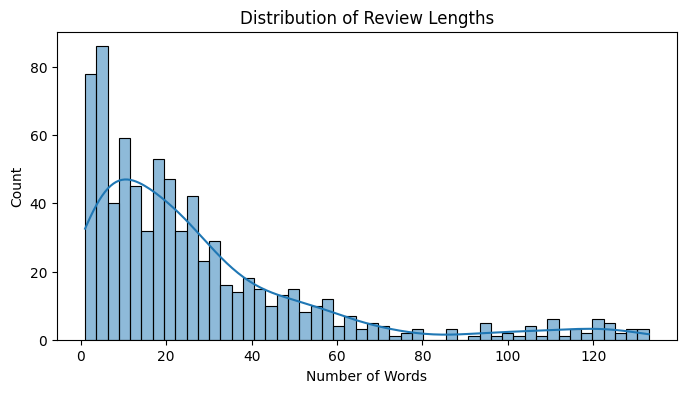

In [9]:
# Compute review length (in words)
df['review_length'] = df['Review'].apply(lambda x: len(str(x).split()))

# Plot distribution of lengths
plt.figure(figsize=(8,4))
sns.histplot(df['review_length'], bins=50, kde=True)
plt.title("Distribution of Review Lengths")
plt.xlabel("Number of Words")
plt.ylabel("Count")
plt.show()


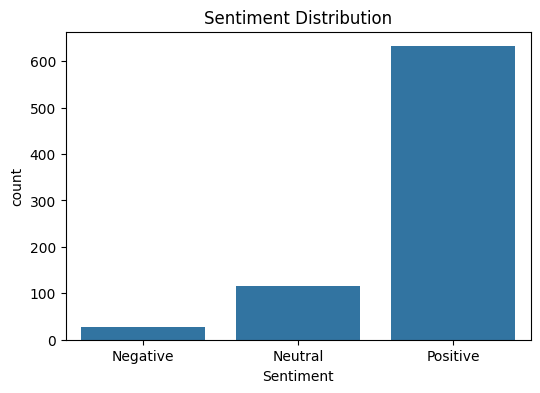

In [10]:
# Make sure ratings are numeric
df['Overall_Rating'] = pd.to_numeric(df['Overall_Rating'], errors='coerce')

# Define labeling function
def label_sentiment(rating):
    if rating <= 2.9:
        return "Negative"
    elif rating <= 3.4:
        return "Neutral"
    else:
        return "Positive"

# Apply to dataset
df['Sentiment'] = df['Overall_Rating'].apply(label_sentiment)

# Visualize sentiment distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Sentiment', data=df, order=['Negative','Neutral','Positive'])
plt.title("Sentiment Distribution")
plt.show()


In [21]:
# Initialize tools
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

def clean_text(text):
    # Lowercase
    text = str(text).lower()
    # Remove numbers, punctuation, emojis
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize
    tokens = nltk.word_tokenize(text)
    # Remove stopwords + short words, then lemmatize
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words and len(w) > 2]
    return " ".join(tokens)

# Apply cleaning
df['Cleaned_Review'] = df['Review'].apply(clean_text)

# Show examples
df[['Review','Cleaned_Review','Sentiment']].head(10)

df.to_csv("zomato_processed.csv", index=False)
print("Processed dataset saved as zomato_processed.csv")

Processed dataset saved as zomato_processed.csv
